In [54]:
import os
%load_ext autoreload
%autoreload 2
import pandas as pd

from feature_normalization.rt_normalization import rt_normalization
from toolsets.feature_alignment import initilize_pmz_rt_list, align, find_istd
from toolsets.file_io import get_file_list
from toolsets.search import quick_search_values, string_search
from toolsets.feature_alignment import get_alignemnt
from toolsets.setup import set_workspace, get_dirs
from toolsets.library_search_npc import identity_search_df
master_folder = '/Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica'
from toolsets.library_search_npc import identity_search_df
set_workspace(master_folder)
# this is the master workspace, all other directories will be created within this workspace
dirs =get_dirs(master_folder, mode='pos')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
the workspace exists!
set up complete
at position 0:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/alignment_result/pos
at position 1:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/bioactivity
at position 2:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/mzml/pos
at position 3:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/normalized_peak_list/pos
at position 4:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/peak_list/pos
at position 5:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/results/pos
at position 6:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/sirius_files/pos
at position 7:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/uv_data
at position 8:  /Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/nmr_data


In [55]:
lib_name = 'curated_lib.csv'
alignment_result = pd.read_csv(os.path.join(dirs[0], 'alignment_result.csv'))
msms_lib = pd.read_csv(os.path.join(dirs[10], lib_name))

In [56]:
msms_lib

,reference_name,reference_smiles,reference_adduct,reference_mix,reference_precursor_mz,ms_level,precursor_mz,charge,rt,peaks,mix,base_name,rt_offset,rt_start,rt_end,peak_apex_intensity,peak_range_idx,ms2_range_idx,pmz_bin
0,Galbacin,CC1C(C)C(OC1C1=CC=C2OCOC2=C1)C1=CC2=C(OCO2)C=C1,[M+K]+,STD002562,379.094232,2,379.094574,1,6.722416,101.90892\t0.03787441\n103.489098\t0.03613222\...,STD002562_P.mzML,STD002562_P.mzML,0.046721,6.680714,6.858130,2.408010e+06,"[380, 382, 390]",[1917],379.094635
1,Galbacin,CC1C(C)C(OC1C1=CC=C2OCOC2=C1)C1=CC2=C(OCO2)C=C1,[M+Na]+,STD002562,363.120292,2,363.121338,1,6.728338,104.502594\t0.07617328\n119.619797\t0.0811236\...,STD002562_P.mzML,STD002562_P.mzML,0.045141,6.680714,6.876420,1.686582e+06,"[380, 383, 391]",[1918],363.120850
2,Galbacin,CC1C(C)C(OC1C1=CC=C2OCOC2=C1)C1=CC2=C(OCO2)C=C1,[M-H2O+H]+,STD002562,323.127786,2,323.127912,1,6.728843,84.188889\t2.114e-05\n89.039825\t2.627e-05\n91...,STD002562_P.mzML,STD002562_P.mzML,0.004239,6.645628,7.326875,3.859060e+08,"[378, 383, 416]","[1896, 1905, 1929, 1951, 1971, 1990, 2005, 202...",323.127869
3,NP-012844,COC1=C(OC)C=C(CC(C)C(C)CC2=CC3=C(OCO3)C=C2)C=C1,[M+Na]+,STD002563,365.172327,2,365.172449,1,7.169752,102.363533\t0.00208444\n107.544121\t0.00224972...,STD002563_P.mzML,STD002563_P.mzML,0.007773,7.115381,7.330606,1.190515e+07,"[405, 408, 417]","[2024, 2044]",365.172058
4,NP-012844,COC1=C(OC)C=C(CC(C)C(C)CC2=CC3=C(OCO3)C=C2)C=C1,[M+H]+,STD002563,343.190386,2,343.189423,1,7.171482,95.070511\t0.0017676\n123.044044\t0.00231149\n...,STD002563_P.mzML,STD002563_P.mzML,0.053833,7.095521,7.438997,9.895780e+06,"[404, 408, 423]",[2038],343.189545
5,Fragransin A2,COC1=CC(=CC=C1O)C1OC(C(C)C1C)C1=CC(OC)=C(O)C=C1,[M+H]+,STD002564,345.169650,2,345.169430,1,5.228888,91.752991\t1.36e-06\n92.020859\t1.684e-05\n94....,STD002564_P.mzML,STD002564_P.mzML,0.024569,5.054309,5.490050,6.946631e+07,"[288, 298, 312]","[1470, 1490, 1512, 1534]",345.169220
6,meso-Austrobailignan-5,CC(CC1=CC2=C(OCO2)C=C1)C(C)CC1=CC2=C(OCO2)C=C1,[M-H2O+H]+,STD002565,309.148521,2,309.148590,1,7.440730,135.044525\t0.07410256\n148.925125\t0.06076478...,STD002565_P.mzML,STD002565_P.mzML,0.065766,7.382602,7.602973,1.355412e+06,"[421, 424, 433]",[2118],309.148499
7,Myristicin,COC1=CC(CC=C)=CC2=C1OCO2,[M+H]+,STD002566,193.085921,2,193.085983,1,5.937882,49.934795\t0.00069079\n63.558453\t0.00067249\n...,STD002566_P.mzML,STD002566_P.mzML,0.009940,5.774689,5.987271,2.084266e+07,"[329, 338, 341]",[1672],193.086014
8,D-Prunasin,OCC1OC(OC(C#N)C2=CC=CC=C2)C(O)C(O)C1O,[M+Na]+,STD002567,318.094805,2,318.094777,1,2.761851,90.875595\t0.00132279\n93.014694\t0.00029923\n...,STD002567_P.mzML,STD002567_P.mzML,0.042105,2.450184,2.936986,8.292358e+06,"[140, 157, 167]","[732, 751, 770, 790, 809]",318.094757
9,Rutin,C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](OC3=C(OC4=CC(O...,[M+Na]+,STD002568,633.142603,2,633.142674,1,2.904095,172.275635\t0.00016081\n172.808578\t0.00186646...,STD002568_P.mzML,STD002568_P.mzML,0.003811,2.638014,3.324753,4.910394e+06,"[151, 166, 190]","[789, 810, 834, 858, 882, 899]",633.142761


In [57]:
identity_search_result = identity_search_df(alignment_result, msms_lib)

100%|██████████| 2442/2442 [00:04<00:00, 603.64it/s]


In [59]:
0.03*60

1.7999999999999998

In [58]:
identity_search_result

,entropy_similarity,pmz,max_intensity,refrence_precursor_mz,rt,reference_rt,reference_smiles,BSD_ID,annotation,feature_type,...,01090_X1_P,01090_X2_P,01090_X3_P,01090_X4_P,01090_X5_P,01090_X6_P,01090_X7_P,01090_X8_P,01090_X9_P,PeakID
0,0.982653,291.0864,3934429,291.086315,2.359639,2.321834,O[C@H]1CC2=C(O)C=C(O)C=C2O[C@@H]1C1=CC=C(O)C(O...,STD002572,Catechin,compound,...,0,1811777,3934429,857702,57375,17317,7804,1068,0,804
1,0.937512,595.1662,1025705,595.165747,3.135239,3.138171,C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](OC3=C(OC4=CC(O...,STD002583,Nicotiflorin,compound,...,0,0,1025705,0,282069,57539,25933,13478,7373,847
2,0.999974,465.1028,17548242,465.102753,3.013042,3.064310,OC[C@H]1O[C@@H](OC2=C(OC3=CC(O)=CC(O)=C3C2=O)C...,STD002587,Isoquercitrin,compound,...,4188,22924,4891995,17548242,948675,199471,113411,46294,35846,1295
3,0.791164,449.1081,10934580,449.107838,3.218873,3.239823,OC[C@H]1O[C@@H](OC2=C(OC3=CC(O)=CC(O)=C3C2=O)C...,STD002579,Astragalin,compound,...,0,0,0,10934580,736307,130957,69037,29412,20483,1306
4,0.937485,595.1666,4237828,595.165747,3.101846,3.138171,C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](OC3=C(OC4=CC(O...,STD002583,Nicotiflorin,compound,...,0,0,0,4237828,0,57539,0,0,7373,1418


In [39]:
identity_search_result

,entropy_similarity,pmz,max_intensity,refrence_precursor_mz,rt,reference_rt,reference_smiles,BSD_ID,annotation,feature_type,...,01090_X1_P,01090_X2_P,01090_X3_P,01090_X4_P,01090_X5_P,01090_X6_P,01090_X7_P,01090_X8_P,01090_X9_P,PeakID
0,0.982653,291.0864,3934429,291.086315,2.359639,2.321834,NaN,STD002572,Catechin,compound,...,0,1811777,3934429,857702,57375,17317,7804,1068,0,804
1,0.937512,595.1662,1025705,595.165747,3.135239,3.138171,NaN,STD002583,Nicotiflorin,compound,...,0,0,1025705,0,282069,57539,25933,13478,7373,847
2,0.999974,465.1028,17548242,465.102753,3.013042,3.064310,NaN,STD002587,Isoquercitrin,compound,...,4188,22924,4891995,17548242,948675,199471,113411,46294,35846,1295
3,0.791164,449.1081,10934580,449.107838,3.218873,3.239823,NaN,STD002579,Astragalin,compound,...,0,0,0,10934580,736307,130957,69037,29412,20483,1306
4,0.937485,595.1666,4237828,595.165747,3.101846,3.138171,NaN,STD002583,Nicotiflorin,compound,...,0,0,0,4237828,0,57539,0,0,7373,1418


# some visulization functions

In [60]:
from toolsets.spectra_plotter import head_to_tail_plot

In [61]:
dirs[5]

'/Volumes/Natural Product Chemistry/Working Space/Fanzhou/Myristica/results/pos'

In [43]:
from rdkit import Chem

In [50]:
from rdkit.Chem import Draw

# here is quick look

In [63]:
identity_search_result

,entropy_similarity,pmz,max_intensity,refrence_precursor_mz,rt,reference_rt,reference_smiles,BSD_ID,annotation,feature_type,...,01090_X1_P,01090_X2_P,01090_X3_P,01090_X4_P,01090_X5_P,01090_X6_P,01090_X7_P,01090_X8_P,01090_X9_P,PeakID
0,0.982653,291.0864,3934429,291.086315,2.359639,2.321834,O[C@H]1CC2=C(O)C=C(O)C=C2O[C@@H]1C1=CC=C(O)C(O...,STD002572,Catechin,compound,...,0,1811777,3934429,857702,57375,17317,7804,1068,0,804
1,0.937512,595.1662,1025705,595.165747,3.135239,3.138171,C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](OC3=C(OC4=CC(O...,STD002583,Nicotiflorin,compound,...,0,0,1025705,0,282069,57539,25933,13478,7373,847
2,0.999974,465.1028,17548242,465.102753,3.013042,3.064310,OC[C@H]1O[C@@H](OC2=C(OC3=CC(O)=CC(O)=C3C2=O)C...,STD002587,Isoquercitrin,compound,...,4188,22924,4891995,17548242,948675,199471,113411,46294,35846,1295
3,0.791164,449.1081,10934580,449.107838,3.218873,3.239823,OC[C@H]1O[C@@H](OC2=C(OC3=CC(O)=CC(O)=C3C2=O)C...,STD002579,Astragalin,compound,...,0,0,0,10934580,736307,130957,69037,29412,20483,1306
4,0.937485,595.1666,4237828,595.165747,3.101846,3.138171,C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](OC3=C(OC4=CC(O...,STD002583,Nicotiflorin,compound,...,0,0,0,4237828,0,57539,0,0,7373,1418


<module 'matplotlib.pyplot' from '/Users/fanzhou.kong/miniconda3/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

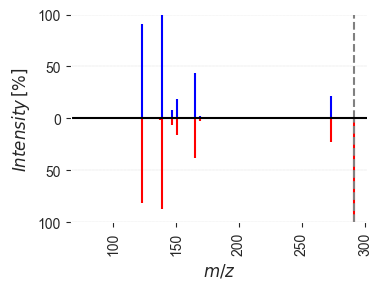

In [64]:

idx = 0
head_to_tail_plot(msms_1=identity_search_result.iloc[idx]['msms'], msms_2=identity_search_result.iloc[idx]['reference_msms'], pmz2=identity_search_result.iloc[idx]['pmz'], pmz1=identity_search_result.iloc[idx]['pmz'], savepath=os.path.join(dirs[5], identity_search_result.iloc[idx]['annotation']+'_annotation.png'))

# below is the batch mode

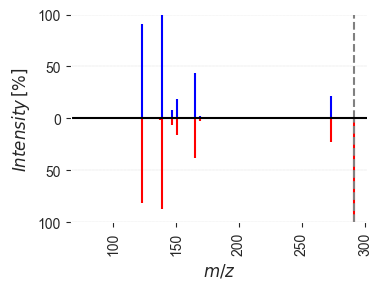

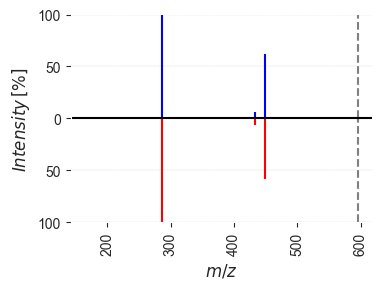

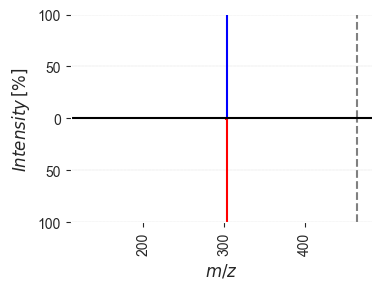

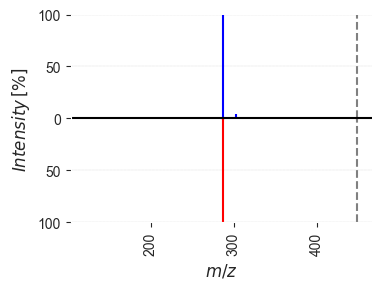

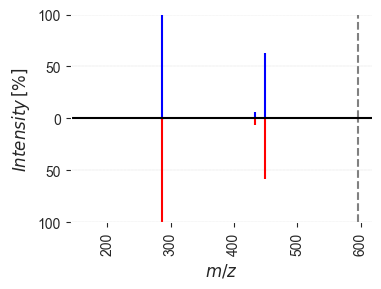

In [62]:
for idx in range(0,len(identity_search_result)):
    # idx = 0
    head_to_tail_plot(msms_1=identity_search_result.iloc[idx]['msms'], msms_2=identity_search_result.iloc[idx]['reference_msms'], pmz2=identity_search_result.iloc[idx]['pmz'], pmz1=identity_search_result.iloc[idx]['pmz'], savepath=os.path.join(dirs[5], identity_search_result.iloc[idx]['annotation']+'_annotation.png'))
    mol = Chem.MolFromSmiles(identity_search_result.iloc[idx]['reference_smiles'])
    Draw.MolToFile(mol, os.path.join(dirs[5], identity_search_result.iloc[idx]['annotation']+'mol_img.png'))